In [1]:
using Distributions
using PyPlot
using VinDsl
srand(12345);

Set up some parameters

In [2]:
K = 3  # number of latent states
M = 2  # number of values of each latent state
T = 500  # number of time steps
U = 100  # units

100

# Make latents

Make distributions of initial state vectors and transition matrices to draw from:

In [3]:
init_dist = Dirichlet([10, 1])

trans_dist = MarkovMatrix([8 1 ; 1 10])

VinDsl.MarkovMatrix(cols=[Distributions.Dirichlet(alpha=[8.0,1.0]),Distributions.Dirichlet(alpha=[1.0,10.0])])

Now construct some random Markov chains.

In [4]:
chains = [MarkovChain(rand(init_dist), rand(trans_dist), T) for _ in 1:K]

3-element Array{VinDsl.MarkovChain{N<:Number,T},1}:
 VinDsl.MarkovChain{Float64,500}(
π0: [0.9584414317183888,0.041558568281611315]
A: 2x2 Array{Float64,2}:
 0.870983  0.208445
 0.129017  0.791555
)
 
 VinDsl.MarkovChain{Float64,500}(
π0: [0.9996784913484221,0.0003215086515778254]
A: 2x2 Array{Float64,2}:
 0.966115   0.12314
 0.0338854  0.87686
)

 VinDsl.MarkovChain{Float64,500}(
π0: [0.7529937012129445,0.24700629878705546]
A: 2x2 Array{Float64,2}:
 0.978808   0.160614
 0.0211919  0.839386
)


Sample from the markov chains:

In [5]:
latents = [rand(c) for c in chains]

3-element Array{Any,1}:
 2x500 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  0.0  0.0  1.0  1.0  1.0  1.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     1.0  1.0  0.0  0.0  0.0  0.0  0.0
 2x500 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 2x500 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [6]:
z = cat(1, [l[2, :] for l in latents]...)

3x500 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  1.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0

PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x7efbae95e050>)

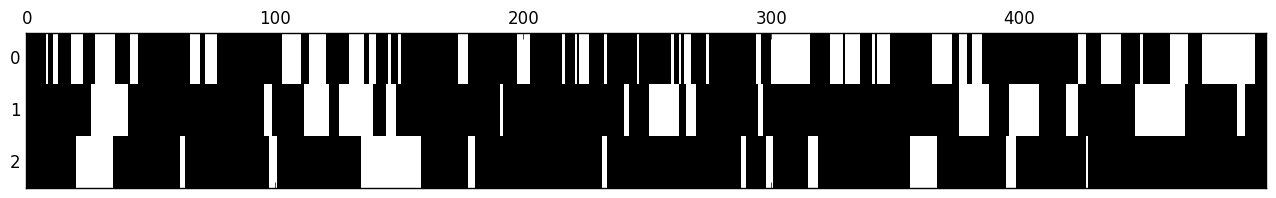

In [7]:
plot(1:10, 2 * (1:10))
clf()
matshow(z, aspect="auto", cmap="gray");

# Make firing rates

## Baselines

In [8]:
baseline = 10.
baseline_sd = 0.10
log_bl = log(baseline)
unit_bl = log_bl + baseline_sd * randn(U);

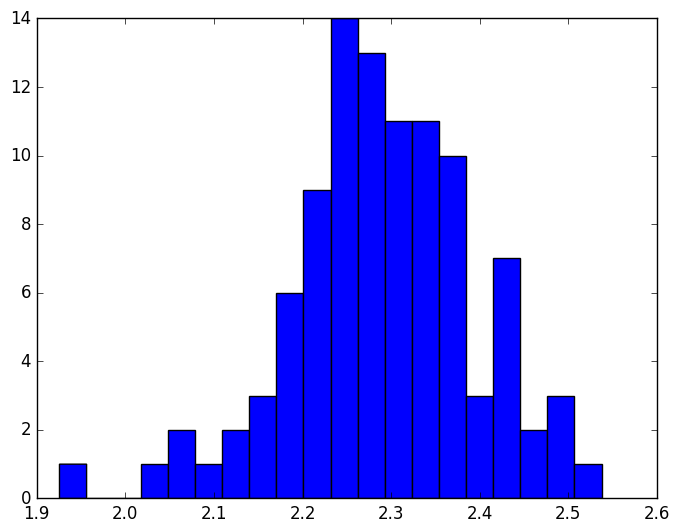

In [9]:
PyPlot.plt[:hist](unit_bl, 20);

## Latent effects

In [10]:
fr_log_effects = [0.5, 1.5, 0.75]
fr_log_sd = 0.01
fr_rands = randn(U, K)
fr_log_units = fr_log_effects' .+ fr_log_sd * fr_rands;

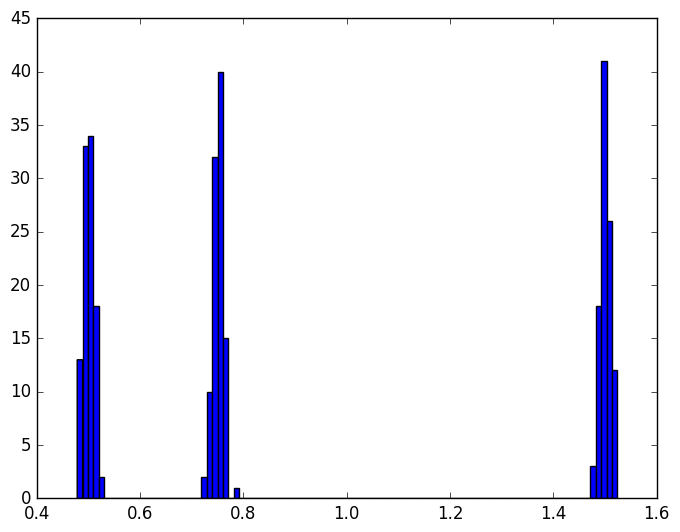

In [11]:
PyPlot.plt[:hist](fr_log_units[:], 100);

## Combine

In [26]:
fr_log = unit_bl' .+ (fr_log_units * z)'
fr = exp(fr_log);

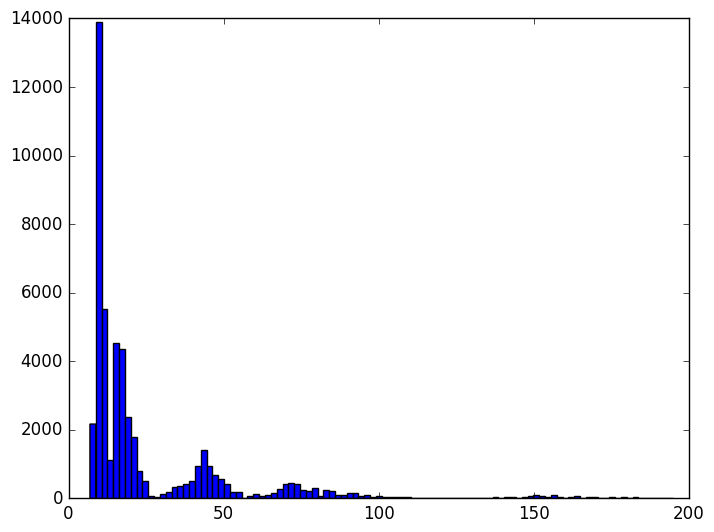

In [27]:
PyPlot.plt[:hist](fr[:], 100);

# Make spikes

In [28]:
spikes = Array{Int}(size(fr)...)
for i in eachindex(fr)
    spikes[i] = rand(Poisson(fr[i]))
end

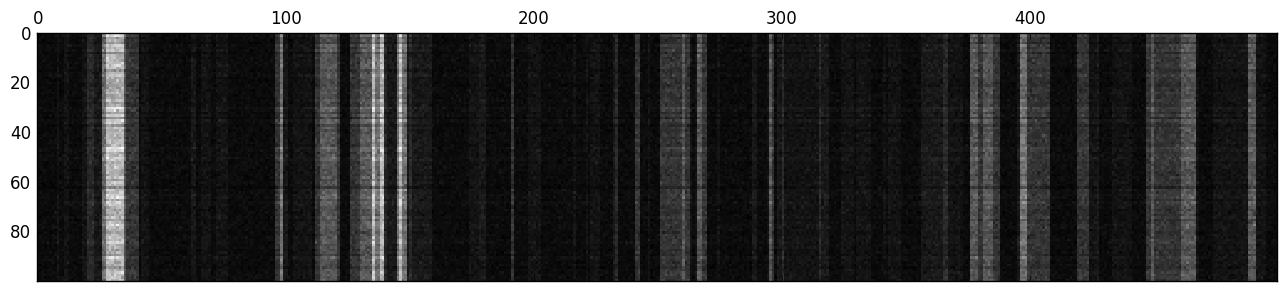

PyObject <matplotlib.image.AxesImage object at 0x7efba8e84e90>

In [29]:
matshow(spikes', aspect="auto", cmap="gray")